# predicting the chance of admission using linear regression

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler as sc
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error

In [2]:
#loading the dataset:
df=pd.read_csv("C:/Users/Geethika Reddy/Downloads/graduate-admissions/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#printing the size and shape of the dataset:
print("size of the dataset:",df.size)
print("shape of the dataset:",df.shape)

size of the dataset: 3600
shape of the dataset: (400, 9)


In [4]:
#printing the information of the dataset:
print("information of the dataset:")
df.info()

information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance_of_Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
#printing the statistical descripition of the dataset:
print("statistical description of the dataset:")
df.describe()

statistical description of the dataset:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# observations:

1.From the above information we can conclude that there are **no missing values** in the dataset.<br>
2.There are totally 8 features or columns which are independent.<br>
3.these **8** features are of **float64** and **int64** datatypes.<br>
    3.1 Serial No.(int64)<br>
    3.2 GRE Score(int64)<br>
    3.3 TOEFL Score(int64)<br>
    3.4 University Rating(int64)<br>
    3.5 SOP(float64)<br>
    3.6 LOR(float64)<br>
    3.7 CGPA(float64)<br>
    3.8 Research(int64)<br>
4.There is one dependent variable called **Chance_of_Admit** and consists of **float64** datatype<br>

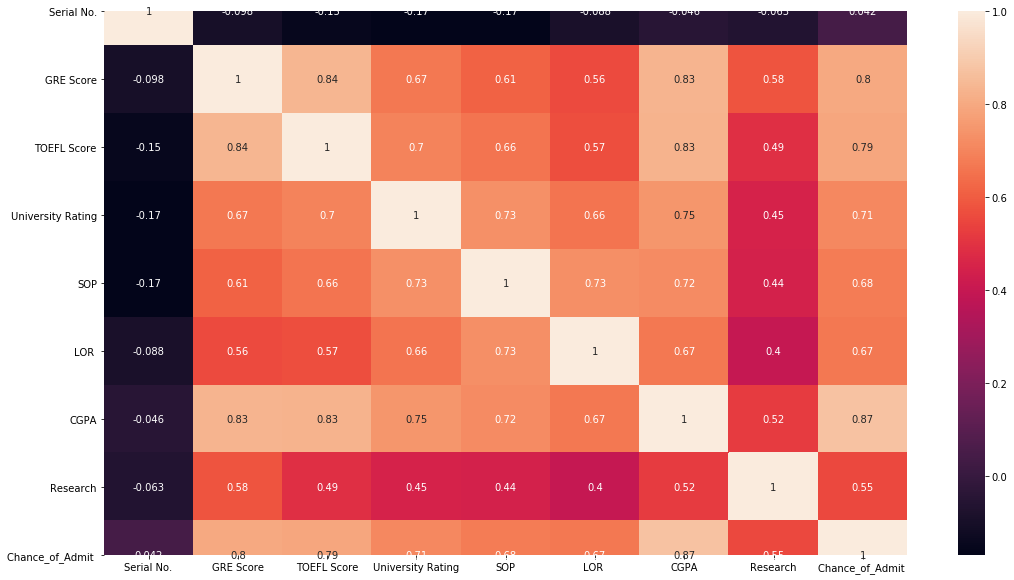

In [6]:
#Finding the strength of the relationship using correlation coefficient and displaying with HEAT MAP:
fig=plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()


# observation:
1.Though every independent feature has correlation with **Chance_of_Admit**,<br>
2.The independent feature **CGPA** has stronger relation than any other because it is highly correlated.<br>

In [8]:
#Gathering the dependent and independent variable into new dataframe:
d_f=df['CGPA']
d_f_=df.iloc[:,-1:]
df_df=pd.concat([d_f,d_f_],axis=1)
df_df.head()

,CGPA,Chance_of_Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [9]:
#printing the size and shape of the new dataset:

print("size of the new dataset:",df_df.size)
print("shape of the new dataset:",df_df.shape)

size of the new dataset: 800
shape of the new dataset: (400, 2)


In [10]:
#printing the information of the new dataset:
print("information of the new dataset:")
df_df.info()

information of the new dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
CGPA                400 non-null float64
Chance_of_Admit     400 non-null float64
dtypes: float64(2)
memory usage: 6.4 KB


In [11]:
#printing the statistical description of the new dataset:
print("statistical description of the new dataset:")
df_df.describe()

statistical description of the new dataset:


,CGPA,Chance_of_Admit
count,400.000000,400.000000
mean,8.598925,0.724350
std,0.596317,0.142609
min,6.800000,0.340000
25%,8.170000,0.640000
50%,8.610000,0.730000
75%,9.062500,0.830000
max,9.920000,0.970000


In [12]:
#correlation of the new dataset:
print(df_df.corr())

                      CGPA  Chance_of_Admit 
CGPA              1.000000          0.873289
Chance_of_Admit   0.873289          1.000000


In [15]:
#splitting the dataset into training(80%) and testing(20%) dataset

x_train=df_df.loc[:319,['CGPA']]
x_test=df_df.loc[320:,['CGPA']]


y_train=df_df.iloc[:320,-1:]
y_test=df_df.iloc[320:,-1:]

In [16]:
#Training the model Linear Regression
reg=lr()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Predicting the chance of admit
y_predict=reg.predict(x_test)

In [18]:
#printing the coefficient :
print("coefficient of the data",reg.coef_)


coefficient of the data [[0.20914808]]


In [19]:
#printing the error rate of the test model:
print("mean squared error :",mean_squared_error(y_test,y_predict))

mean squared error : 0.004554519604971413


# observation:

1.The **error rate** of the model is too low,i.e **0.0045**<br>
2.The fitted model is **higly accurate** because because the **error rate** is **too low**.<br>

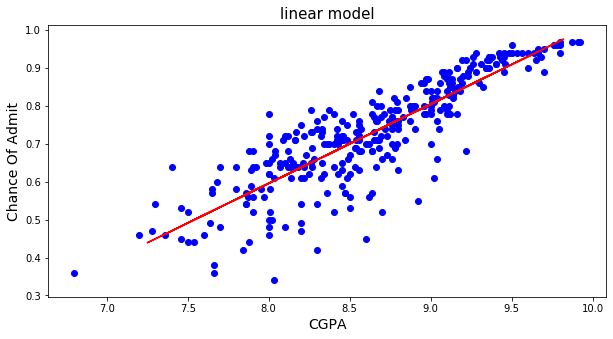

In [20]:
#plotting the linear model and scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_predict,color='red')
plt.title("linear model",fontsize=15)
plt.xlabel("CGPA",fontsize=14)
plt.ylabel("Chance Of Admit",fontsize=14)
plt.show()

# observation 

The regression line fitted accurately as it has the lowest cost function value"0.004"